<a href="https://colab.research.google.com/github/Hdavid1123/Interferometria_AstropIII/blob/master/Tranformada_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def analizar_senal(
    csv_path,
    sep=",",
    header="infer",
    time_col=0,
    voltage_col=1,
    plot_time=True,
    plot_fft=True,
    n_top=5,              # nº de frecuencias de mayor amplitud
    amp_threshold=None    # umbral de amplitud
):
    """
    Si amp_threshold es None → retorna n_top frecuencias más fuertes.
    Si amp_threshold está definido → ignora n_top y retorna solo las que lo superan.
    """

    # --- Leer CSV ---
    df = pd.read_csv(csv_path, sep=sep, header=header)

    t_us = df.iloc[:, time_col].values.astype(float)
    x_mV = df.iloc[:, voltage_col].values.astype(float)

    t = t_us * 1e-6
    x = x_mV * 1e-3

    # --- Gráfico en tiempo ---
    if plot_time:
        plt.figure(figsize=(10, 4))
        plt.plot(t, x)
        plt.title("Señal en el dominio del tiempo")
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Voltaje [V]")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # --- FFT ---
    dt = np.mean(np.diff(t))
    fs = 1.0 / dt

    N = len(x)
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(N, d=dt)
    amp = (2.0 / N) * np.abs(X)

    # --- FFT Plot ---
    if plot_fft:
        plt.figure(figsize=(10, 4))
        plt.plot(freqs, amp)
        plt.title("Espectro de amplitud (FFT)")
        plt.xlabel("Frecuencia [Hz]")
        plt.ylabel("Amplitud")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # --- Eliminar componente DC ---
    amp_no_dc = amp.copy()
    amp_no_dc[0] = 0

    # amp_threshold ESTÁ DEFINIDO → IGNORA n_top
    if amp_threshold is not None:
        idx_thr = np.where(amp_no_dc >= amp_threshold)[0]

        # ordenadas de mayor a menor
        idx_thr_sorted = idx_thr[np.argsort(amp_no_dc[idx_thr])[::-1]]

        resultado = [(freqs[i], amp[i]) for i in idx_thr_sorted]

        print(f"\nFrecuencias con amplitud >= {amp_threshold}:")
        if len(resultado) == 0:
            print("  Ninguna frecuencia supera ese umbral.")
        else:
            for f, a in resultado:
                print(f"  {f:.3f} Hz  ->  amplitud {a:.5f}")

        return resultado

    # amp_threshold = None → usar n_top
    idx_sorted = np.argsort(amp_no_dc)[::-1]
    n_top = min(n_top, len(freqs))

    top_indices = idx_sorted[:n_top]
    resultado = [(freqs[i], amp[i]) for i in top_indices]

    return resultado


# ***do***

## calibrate_do1

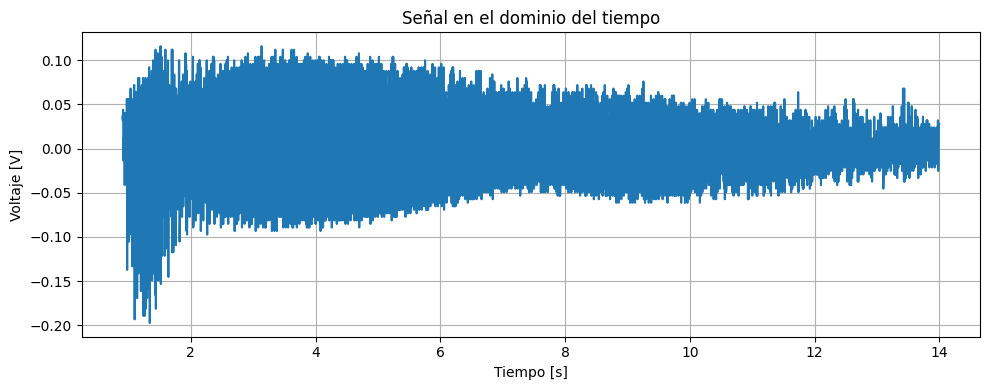

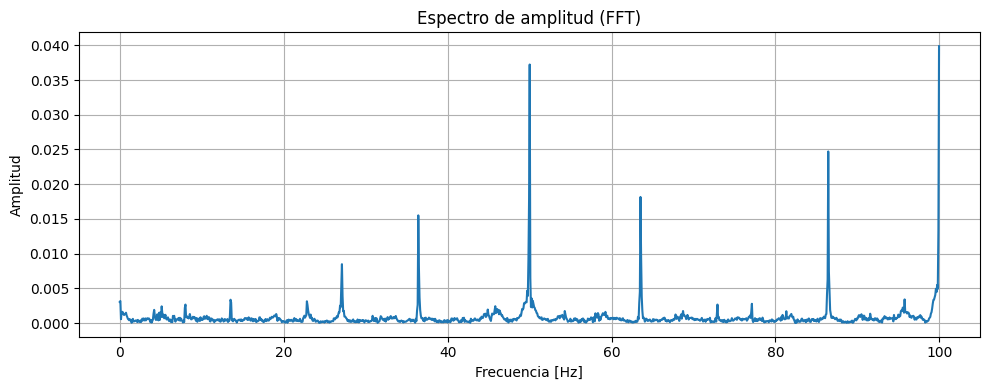

[(np.float64(99.96181748759068), np.float64(0.039875775311097074)),
 (np.float64(50.01909125620466), np.float64(0.03723359302697387)),
 (np.float64(86.44520809469263), np.float64(0.02471472217618441)),
 (np.float64(63.535700649102715), np.float64(0.01816500394666594)),
 (np.float64(49.942726231386025), np.float64(0.017914071059107098))]

In [3]:
analizar_senal("/content/calibrate_do1.csv")

##calibrate_do2

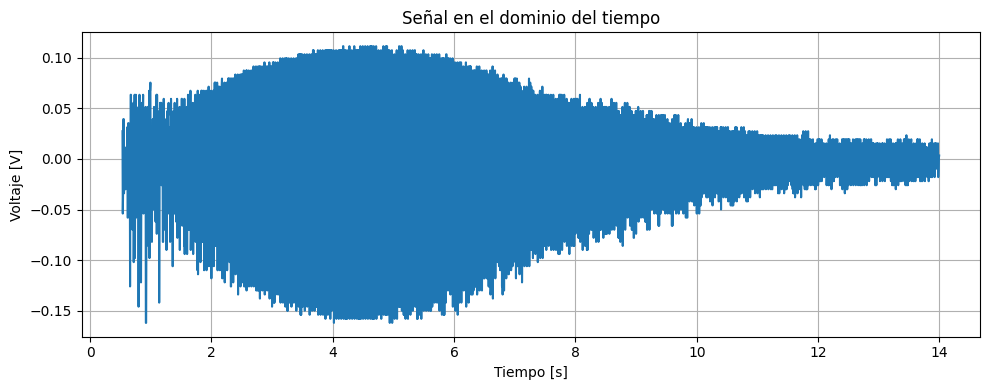

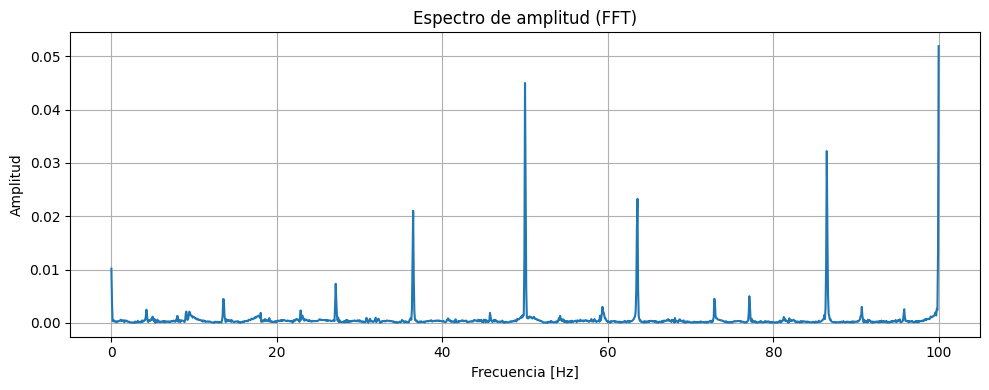

[(np.float64(99.96286669142222), np.float64(0.051897790255070714)),
 (np.float64(49.98143334571111), np.float64(0.04499054512447063)),
 (np.float64(86.44634236910511), np.float64(0.03223447680690499)),
 (np.float64(50.0556999628667), np.float64(0.02689808222715854)),
 (np.float64(63.57222428518382), np.float64(0.023269362440392866))]

In [4]:
analizar_senal("/content/calibrate_do2.csv")

##calibrate_do3

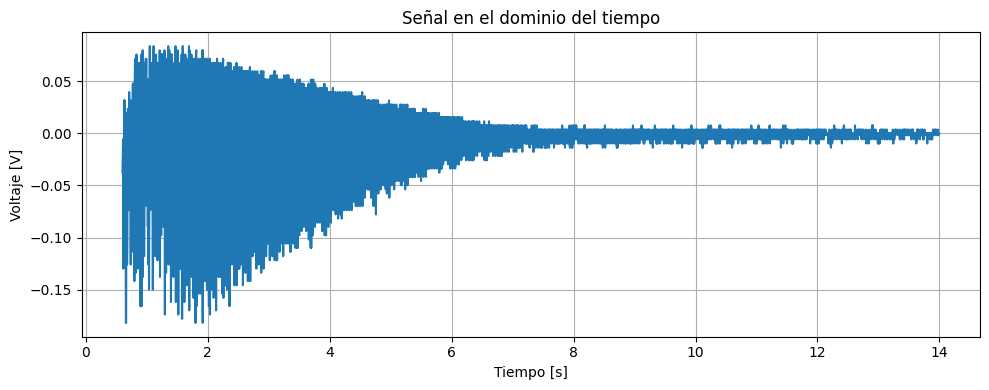

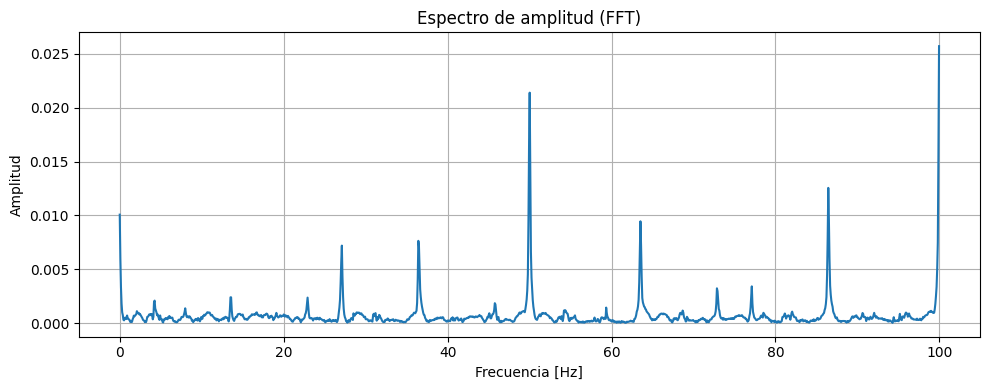

[(np.float64(99.96267263904443), np.float64(0.02572627651199967)),
 (np.float64(50.01866368047779), np.float64(0.021404751552190734)),
 (np.float64(49.944008958566634), np.float64(0.01688032067245736)),
 (np.float64(99.88801791713327), np.float64(0.015571372697844464)),
 (np.float64(50.09331840238896), np.float64(0.01332028863488516))]

In [5]:
analizar_senal("/content/calibrate_do3.csv")

##calibrate_do4

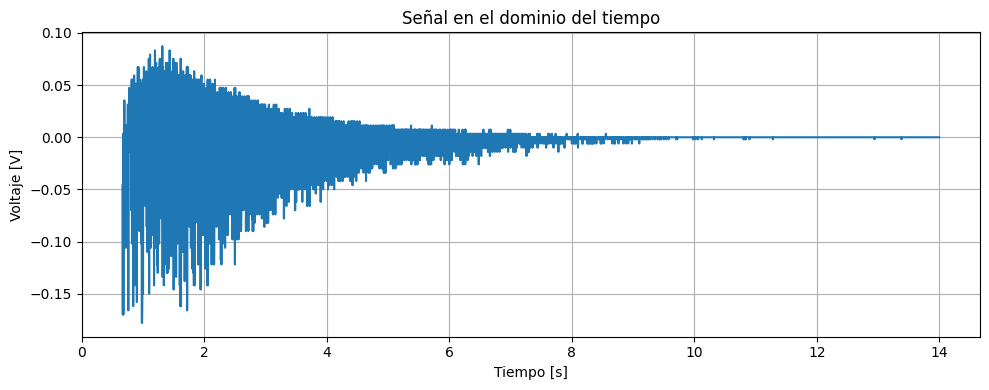

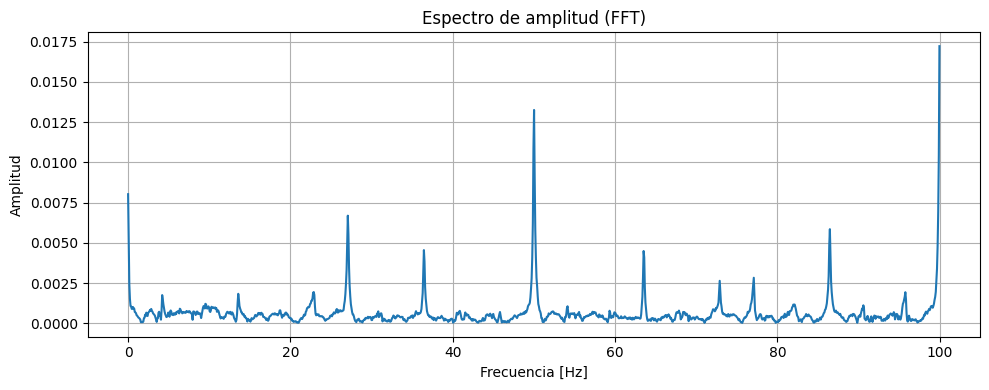

[(np.float64(99.96250468691416), np.float64(0.017220417385722084)),
 (np.float64(50.01874765654294), np.float64(0.013256905876558336)),
 (np.float64(49.943757030371216), np.float64(0.010892422904713641)),
 (np.float64(99.88751406074243), np.float64(0.010462829814478738)),
 (np.float64(50.093738282714675), np.float64(0.009085652801913799))]

In [6]:
analizar_senal("/content/calibrate_do4.csv")

##calibrate_do5

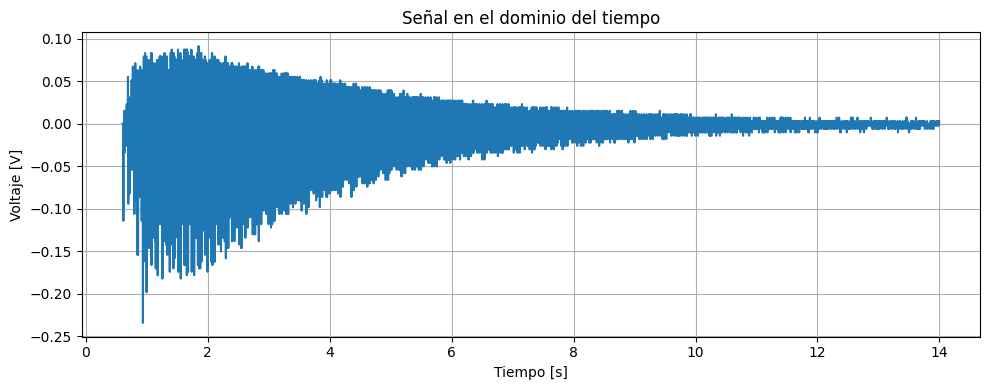

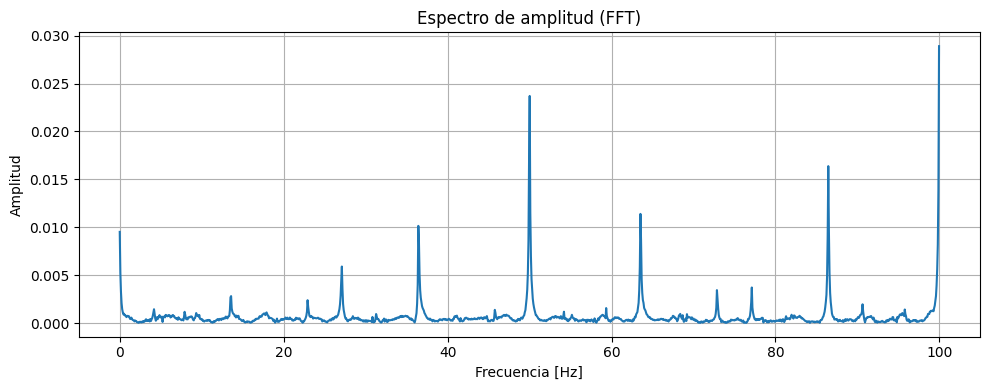

[(np.float64(99.96267263904443), np.float64(0.028910317470772457)),
 (np.float64(50.01866368047779), np.float64(0.023710306867728213)),
 (np.float64(49.944008958566634), np.float64(0.01741227687678237)),
 (np.float64(86.45016797312431), np.float64(0.016381481839529248)),
 (np.float64(99.88801791713327), np.float64(0.01395589642172623))]

In [7]:
analizar_senal("/content/calibrate_do5.csv")

##calibrate_do6

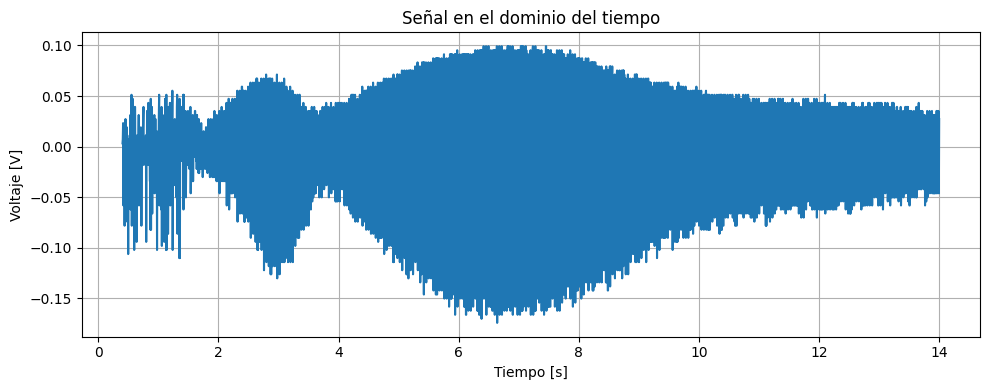

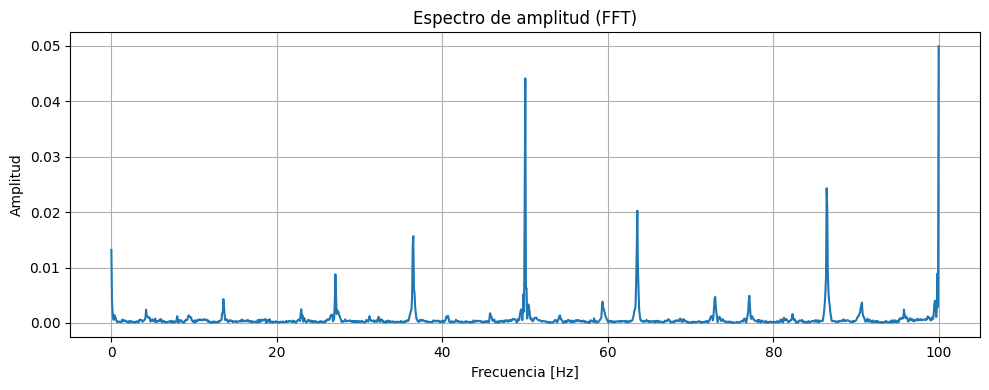

[(np.float64(99.96322177271054), np.float64(0.04993104320727196)),
 (np.float64(50.018389113644716), np.float64(0.044117953125230244)),
 (np.float64(49.94483265906583), np.float64(0.02457620540920282)),
 (np.float64(86.42883413019491), np.float64(0.02430883426708709)),
 (np.float64(86.5023905847738), np.float64(0.0209013707129948))]

In [8]:
analizar_senal("/content/calibrate_do6.csv")

# ***la***

## calibrate_la1

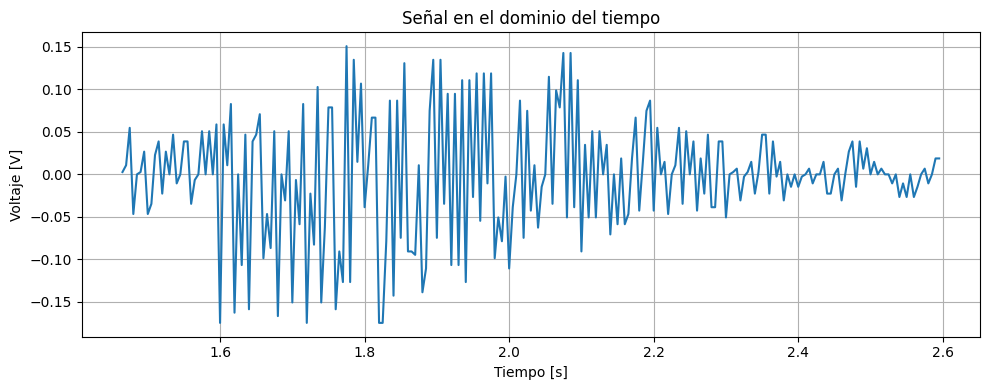

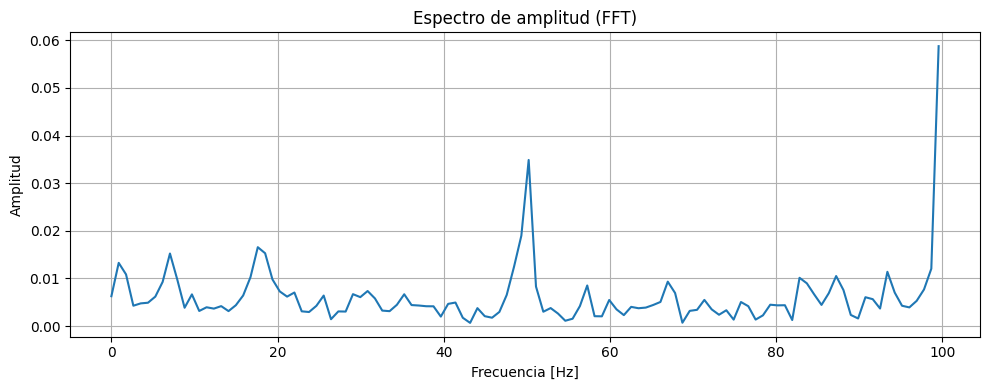

[(np.float64(99.55947136563879), np.float64(0.05876766138738609)),
 (np.float64(50.22026431718063), np.float64(0.03487465563607804)),
 (np.float64(49.339207048458164), np.float64(0.018978056935229533)),
 (np.float64(17.62114537444934), np.float64(0.016558706754833903)),
 (np.float64(18.50220264317181), np.float64(0.015288673080254134))]

In [9]:
analizar_senal("/content/calibrate_la1.csv")

# ***la_sub***

## calibrate_la2

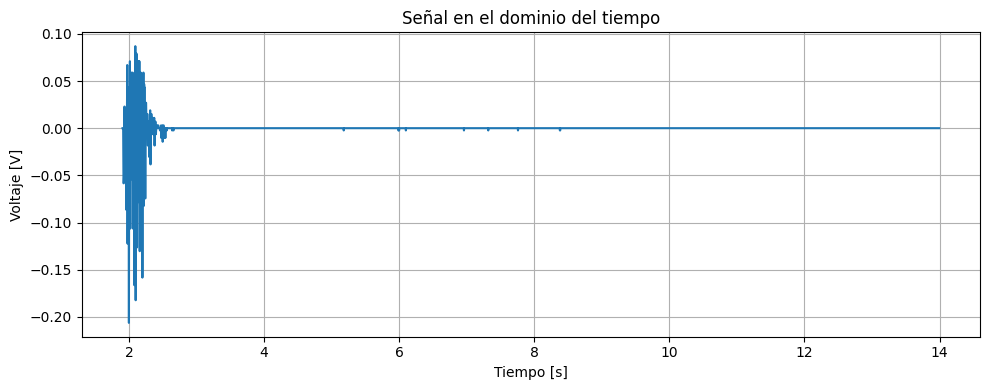

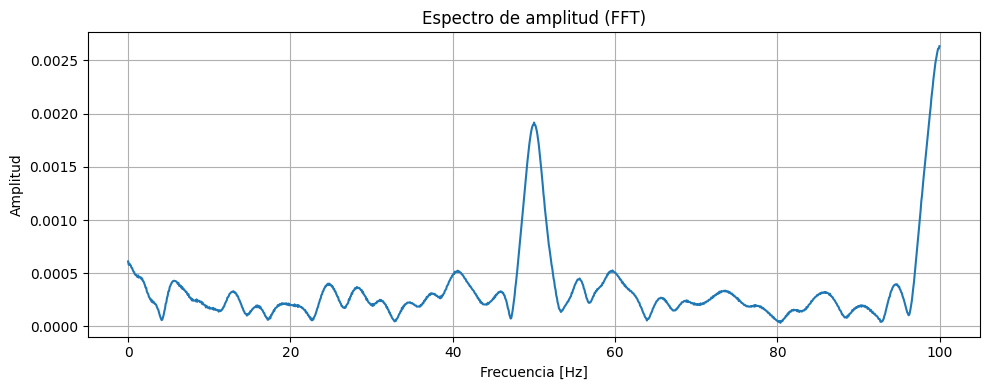

[(np.float64(99.95866060355519), np.float64(0.002634710889641388)),
 (np.float64(99.79330301777594), np.float64(0.002611123876481303)),
 (np.float64(99.87598181066556), np.float64(0.002610222837481773)),
 (np.float64(99.71062422488632), np.float64(0.002582903458341298)),
 (np.float64(99.6279454319967), np.float64(0.002551988337787514))]

In [10]:
analizar_senal("/content/calibrate_la2.csv")

## calibrate_la3

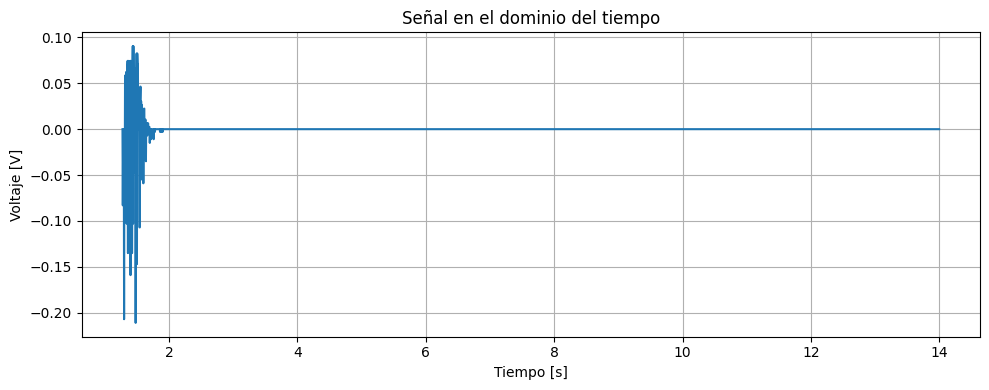

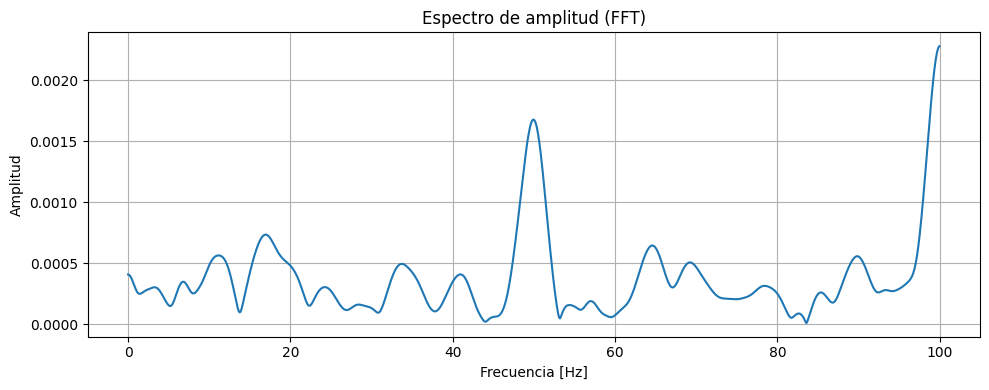

[(np.float64(99.96070726915522), np.float64(0.0022808731262389686)),
 (np.float64(99.88212180746564), np.float64(0.0022751541114406815)),
 (np.float64(99.80353634577605), np.float64(0.0022637673740794344)),
 (np.float64(99.72495088408645), np.float64(0.0022468145615198638)),
 (np.float64(99.64636542239687), np.float64(0.0022244458265062855))]

In [12]:
analizar_senal("/content/calibrate_la3.csv")

## calibrate_la4

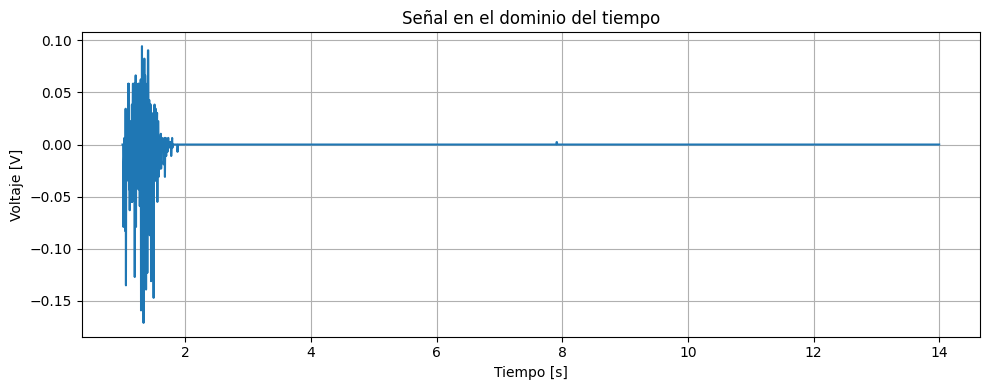

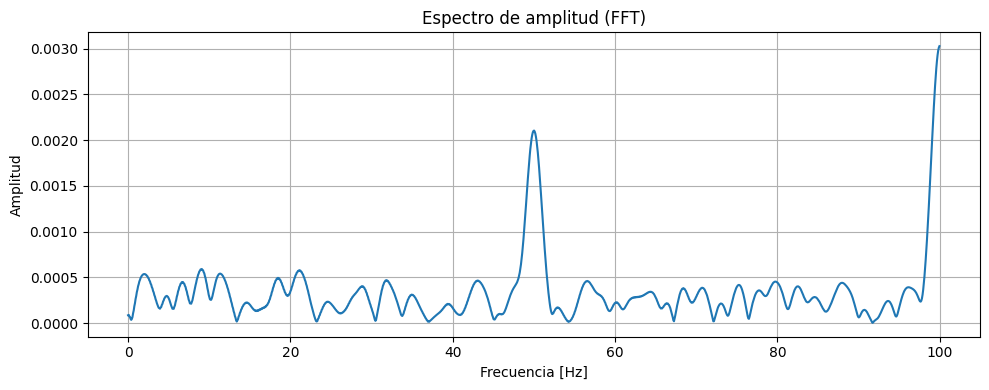

[(np.float64(99.96152366294731), np.float64(0.0030279096101901155)),
 (np.float64(99.88457098884189), np.float64(0.0030112255963435377)),
 (np.float64(99.80761831473646), np.float64(0.0029780903098461558)),
 (np.float64(99.73066564063103), np.float64(0.0029290989125372066)),
 (np.float64(99.6537129665256), np.float64(0.0028649221299706963)),
 (np.float64(99.57676029242019), np.float64(0.0027866915247207573)),
 (np.float64(99.49980761831476), np.float64(0.002695437253295601)),
 (np.float64(99.42285494420933), np.float64(0.0025927173927290203)),
 (np.float64(99.3459022701039), np.float64(0.002479803260931414)),
 (np.float64(99.26894959599848), np.float64(0.002358532806154737)),
 (np.float64(99.19199692189306), np.float64(0.002230277861516606)),
 (np.float64(50.01923816852637), np.float64(0.002105039657909254)),
 (np.float64(49.94228549442094), np.float64(0.0021006797306347045)),
 (np.float64(99.11504424778764), np.float64(0.0020969922486829533)),
 (np.float64(50.09619084263179), np.float

In [15]:
analizar_senal("/content/calibrate_la4.csv", n_top=20)

## calibrate_la5

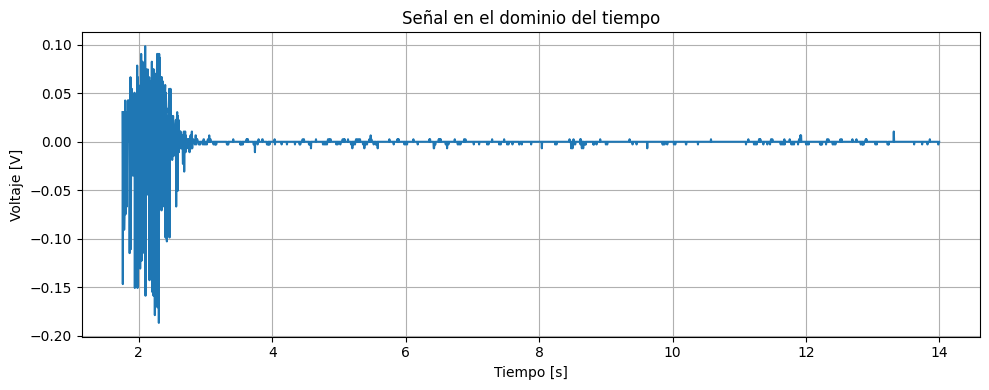

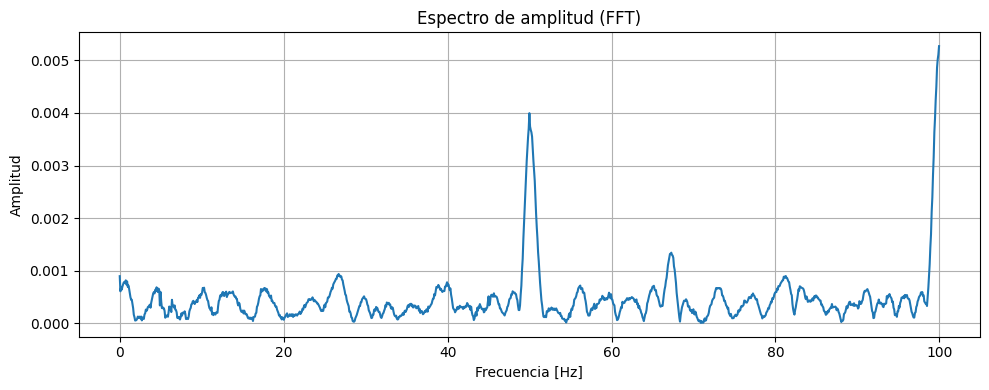


Frecuencias con amplitud >= 0.001:
  99.959 Hz  ->  amplitud 0.00527
  99.878 Hz  ->  amplitud 0.00511
  99.796 Hz  ->  amplitud 0.00502
  99.714 Hz  ->  amplitud 0.00486
  99.633 Hz  ->  amplitud 0.00450
  99.551 Hz  ->  amplitud 0.00425
  49.980 Hz  ->  amplitud 0.00400
  99.469 Hz  ->  amplitud 0.00390
  50.061 Hz  ->  amplitud 0.00374
  49.898 Hz  ->  amplitud 0.00371
  50.143 Hz  ->  amplitud 0.00368
  50.225 Hz  ->  amplitud 0.00363
  99.388 Hz  ->  amplitud 0.00363
  50.306 Hz  ->  amplitud 0.00355
  49.816 Hz  ->  amplitud 0.00354
  49.735 Hz  ->  amplitud 0.00332
  50.388 Hz  ->  amplitud 0.00331
  99.306 Hz  ->  amplitud 0.00316
  50.470 Hz  ->  amplitud 0.00310
  49.653 Hz  ->  amplitud 0.00309
  50.551 Hz  ->  amplitud 0.00289
  49.571 Hz  ->  amplitud 0.00283
  99.224 Hz  ->  amplitud 0.00283
  50.633 Hz  ->  amplitud 0.00271
  49.490 Hz  ->  amplitud 0.00252
  99.143 Hz  ->  amplitud 0.00240
  50.715 Hz  ->  amplitud 0.00237
  49.408 Hz  ->  amplitud 0.00223
  99.061 Hz 

[(np.float64(99.95916700694163), np.float64(0.00526835610169178)),
 (np.float64(99.87750102082484), np.float64(0.0051067591907130805)),
 (np.float64(99.79583503470806), np.float64(0.005015289234233823)),
 (np.float64(99.71416904859127), np.float64(0.004859069410551142)),
 (np.float64(99.6325030624745), np.float64(0.004500697643218121)),
 (np.float64(99.55083707635771), np.float64(0.004245228637751703)),
 (np.float64(49.97958350347081), np.float64(0.003995686689489345)),
 (np.float64(99.46917109024093), np.float64(0.0038991647734540964)),
 (np.float64(50.061249489587595), np.float64(0.0037420631501444875)),
 (np.float64(49.89791751735403), np.float64(0.003705936719691443)),
 (np.float64(50.14291547570438), np.float64(0.00367654544718818)),
 (np.float64(50.22458146182116), np.float64(0.003633933629611789)),
 (np.float64(99.38750510412414), np.float64(0.0036318244297968236)),
 (np.float64(50.30624744793794), np.float64(0.0035499498041179343)),
 (np.float64(49.81625153123725), np.float64(0

In [16]:
analizar_senal("/content/calibrate_la5.csv", amp_threshold=0.001)

## substracted_la1

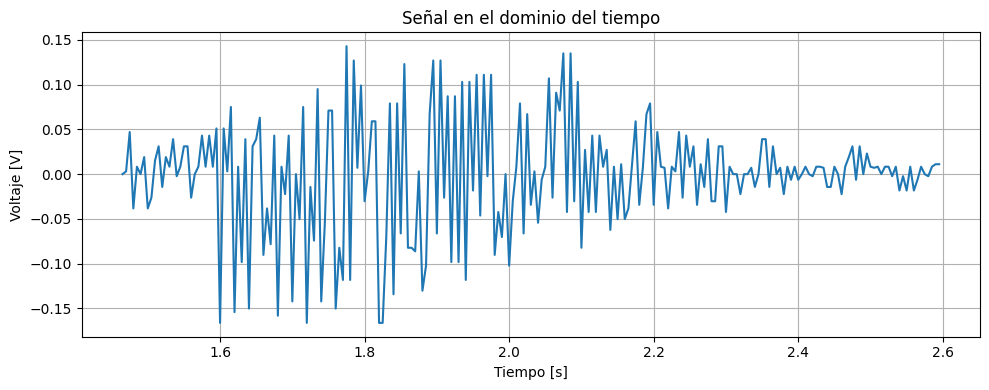

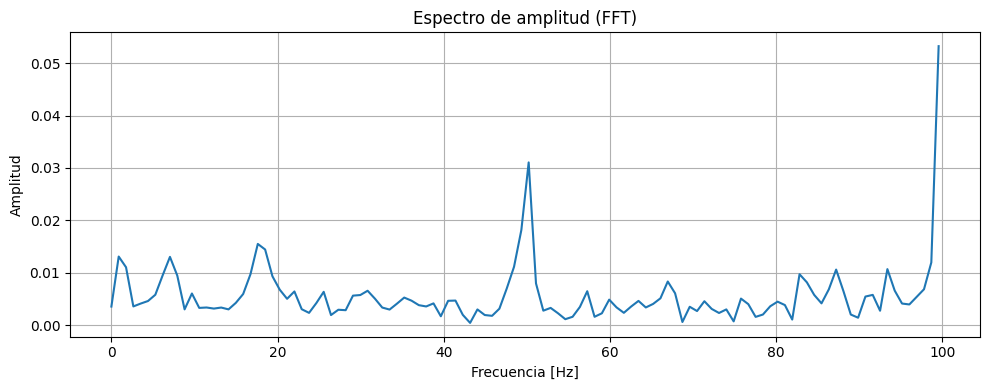


Frecuencias con amplitud >= 0.01:
  99.559 Hz  ->  amplitud 0.05325
  50.220 Hz  ->  amplitud 0.03105
  49.339 Hz  ->  amplitud 0.01814
  17.621 Hz  ->  amplitud 0.01548
  18.502 Hz  ->  amplitud 0.01442
  0.881 Hz  ->  amplitud 0.01307
  7.048 Hz  ->  amplitud 0.01301
  98.678 Hz  ->  amplitud 0.01195
  48.458 Hz  ->  amplitud 0.01112
  1.762 Hz  ->  amplitud 0.01103
  93.392 Hz  ->  amplitud 0.01067
  87.225 Hz  ->  amplitud 0.01059


[(np.float64(99.55947136563879), np.float64(0.05324937577238753)),
 (np.float64(50.22026431718063), np.float64(0.031050428581838874)),
 (np.float64(49.339207048458164), np.float64(0.01814231074480126)),
 (np.float64(17.62114537444934), np.float64(0.01548378585486809)),
 (np.float64(18.50220264317181), np.float64(0.014421191621831713)),
 (np.float64(0.8810572687224671), np.float64(0.013074707557596132)),
 (np.float64(7.048458149779737), np.float64(0.0130137274164681)),
 (np.float64(98.67841409691633), np.float64(0.01194781040995789)),
 (np.float64(48.45814977973569), np.float64(0.011119074527710791)),
 (np.float64(1.7621145374449343), np.float64(0.011032891085432896)),
 (np.float64(93.39207048458152), np.float64(0.010674109841617855)),
 (np.float64(87.22466960352425), np.float64(0.010586864962327518))]

In [17]:
analizar_senal("/content/substracted_la1.csv", amp_threshold=0.01)

# ***Pulse***

## calibrate_p1

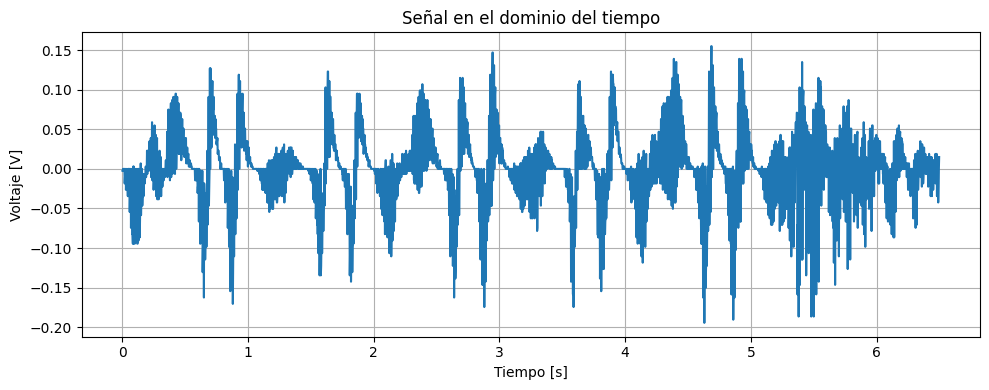

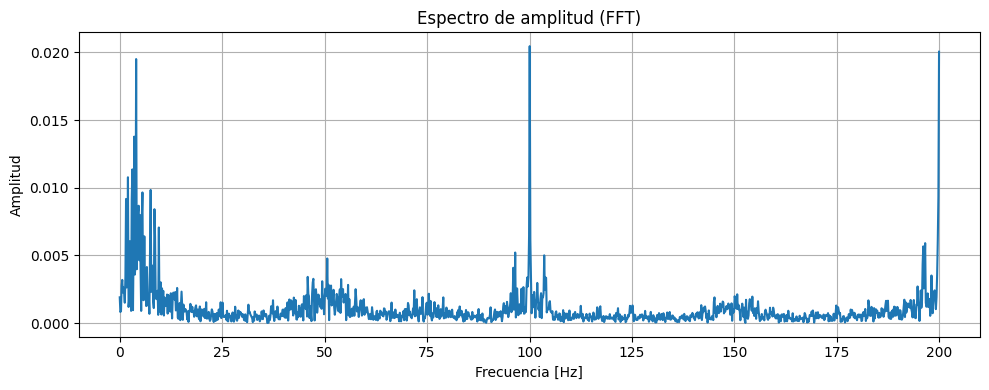


Frecuencias con amplitud >= 0.005:
  100.038 Hz  ->  amplitud 0.02047
  199.923 Hz  ->  amplitud 0.02006
  4.002 Hz  ->  amplitud 0.01951
  3.540 Hz  ->  amplitud 0.01378
  3.078 Hz  ->  amplitud 0.01136
  2.001 Hz  ->  amplitud 0.01077
  7.541 Hz  ->  amplitud 0.00984
  5.541 Hz  ->  amplitud 0.00965
  199.769 Hz  ->  amplitud 0.00936
  1.539 Hz  ->  amplitud 0.00917
  2.924 Hz  ->  amplitud 0.00913
  4.617 Hz  ->  amplitud 0.00867
  8.465 Hz  ->  amplitud 0.00841
  4.463 Hz  ->  amplitud 0.00821
  4.925 Hz  ->  amplitud 0.00799
  5.387 Hz  ->  amplitud 0.00780
  9.542 Hz  ->  amplitud 0.00706
  4.309 Hz  ->  amplitud 0.00649
  99.885 Hz  ->  amplitud 0.00644
  6.002 Hz  ->  amplitud 0.00641
  8.619 Hz  ->  amplitud 0.00637
  100.192 Hz  ->  amplitud 0.00614
  199.615 Hz  ->  amplitud 0.00609
  2.462 Hz  ->  amplitud 0.00604
  196.537 Hz  ->  amplitud 0.00590
  3.386 Hz  ->  amplitud 0.00581
  196.075 Hz  ->  amplitud 0.00567
  7.387 Hz  ->  amplitud 0.00546
  96.499 Hz  ->  amplitud

[(np.float64(100.03847633705274), np.float64(0.020465967778362616)),
 (np.float64(199.92304732589463), np.float64(0.02005614286807898)),
 (np.float64(4.00153905348211), np.float64(0.01951290642051295)),
 (np.float64(3.539823008849558), np.float64(0.013778491247353147)),
 (np.float64(3.078106964217007), np.float64(0.011357138789222667)),
 (np.float64(2.000769526741055), np.float64(0.010774704927576234)),
 (np.float64(7.541362062331668), np.float64(0.009837209134998741)),
 (np.float64(5.540592535590613), np.float64(0.009652495868601141)),
 (np.float64(199.76914197768377), np.float64(0.009358031085908918)),
 (np.float64(1.5390534821085036), np.float64(0.009170778778010123)),
 (np.float64(2.924201616006157), np.float64(0.009127974411917787)),
 (np.float64(4.617160446325511), np.float64(0.0086687509579047)),
 (np.float64(8.46479415159677), np.float64(0.008413782303364072)),
 (np.float64(4.463255098114661), np.float64(0.008212634558410346)),
 (np.float64(4.924971142747212), np.float64(0.0079

In [18]:
analizar_senal("/content/calibrate_p1.csv", amp_threshold=0.005)

## calibrate_p2

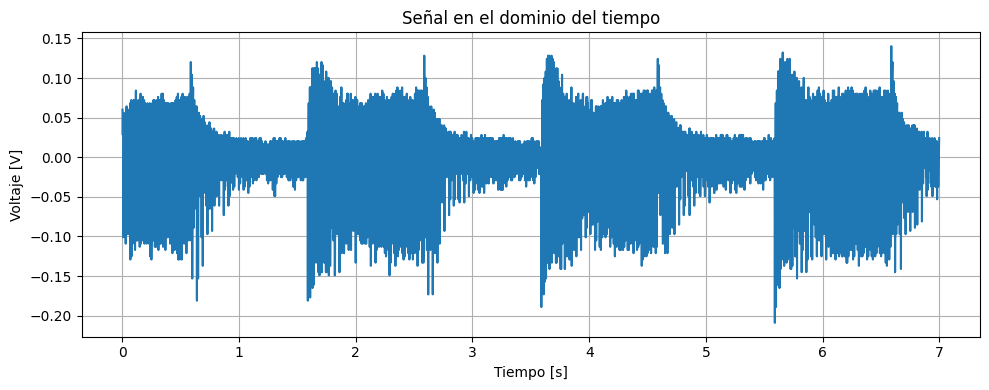

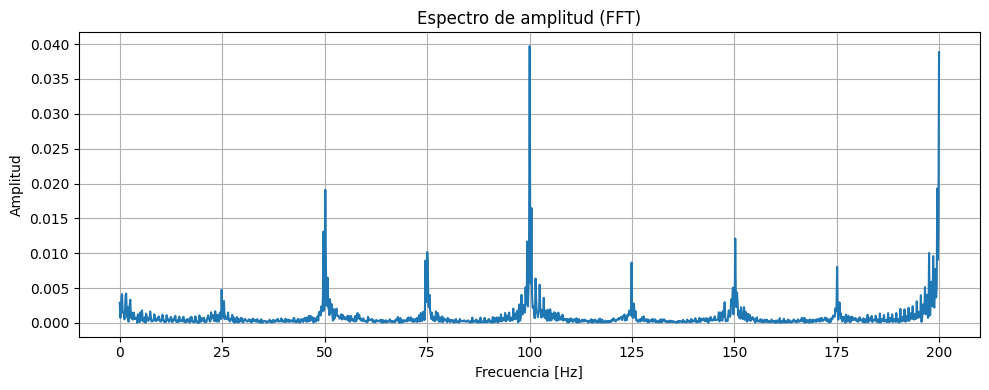


Frecuencias con amplitud >= 0.005:
  100.036 Hz  ->  amplitud 0.03971
  199.929 Hz  ->  amplitud 0.03883
  199.500 Hz  ->  amplitud 0.01928
  50.161 Hz  ->  amplitud 0.01909
  100.464 Hz  ->  amplitud 0.01648
  199.786 Hz  ->  amplitud 0.01469
  49.732 Hz  ->  amplitud 0.01313
  99.893 Hz  ->  amplitud 0.01280
  150.196 Hz  ->  amplitud 0.01212
  99.464 Hz  ->  amplitud 0.01169
  75.027 Hz  ->  amplitud 0.01016
  197.499 Hz  ->  amplitud 0.01004
  198.499 Hz  ->  amplitud 0.00959
  199.643 Hz  ->  amplitud 0.00905
  74.598 Hz  ->  amplitud 0.00896
  100.179 Hz  ->  amplitud 0.00891
  50.304 Hz  ->  amplitud 0.00887
  75.170 Hz  ->  amplitud 0.00878
  124.902 Hz  ->  amplitud 0.00866
  175.063 Hz  ->  amplitud 0.00805
  199.071 Hz  ->  amplitud 0.00777
  50.732 Hz  ->  amplitud 0.00650
  101.465 Hz  ->  amplitud 0.00638
  198.071 Hz  ->  amplitud 0.00592
  100.322 Hz  ->  amplitud 0.00564
  102.465 Hz  ->  amplitud 0.00548
  50.018 Hz  ->  amplitud 0.00519
  199.357 Hz  ->  amplitud 0.

[(np.float64(100.03572704537336), np.float64(0.03970607447468487)),
 (np.float64(199.92854590925333), np.float64(0.0388342774008036)),
 (np.float64(199.49982136477317), np.float64(0.01928237582219472)),
 (np.float64(50.16077170418007), np.float64(0.019090588884223436)),
 (np.float64(100.46445158985354), np.float64(0.016484005226474575)),
 (np.float64(199.78563772775993), np.float64(0.014687139372806073)),
 (np.float64(49.7320471596999), np.float64(0.01313450501270896)),
 (np.float64(99.89281886387997), np.float64(0.012803246687029321)),
 (np.float64(150.19649874955343), np.float64(0.012123591045054272)),
 (np.float64(99.4640943193998), np.float64(0.01168790937977429)),
 (np.float64(75.02679528403002), np.float64(0.010162966668618241)),
 (np.float64(197.4991068238657), np.float64(0.010041055917041906)),
 (np.float64(198.49946409431942), np.float64(0.009593618630773208)),
 (np.float64(199.64272954626657), np.float64(0.009053090242868517)),
 (np.float64(74.59807073954985), np.float64(0.00

In [19]:
analizar_senal("/content/calibrate_p2.csv", amp_threshold=0.005)

# ***sin***

## calibrate_sin01

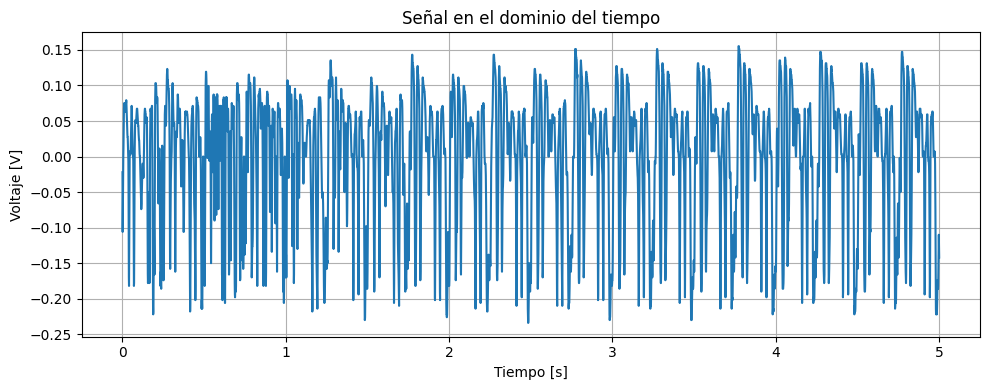

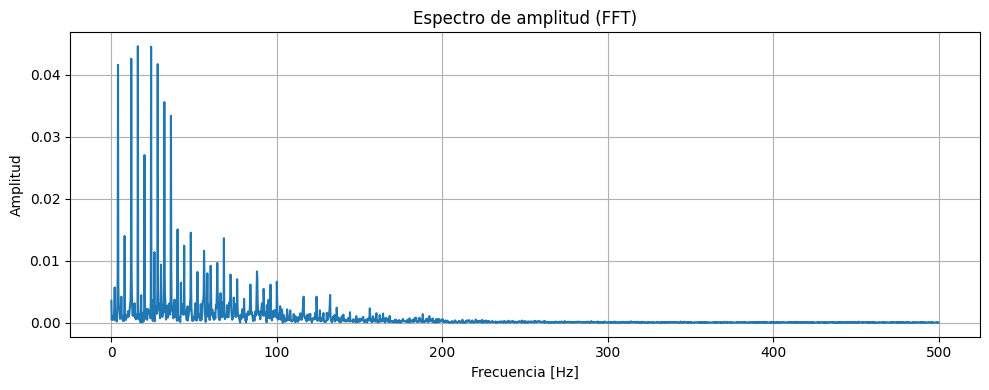


Frecuencias con amplitud >= 0.01:
  16.000 Hz  ->  amplitud 0.04461
  24.000 Hz  ->  amplitud 0.04451
  12.000 Hz  ->  amplitud 0.04258
  28.000 Hz  ->  amplitud 0.04172
  4.000 Hz  ->  amplitud 0.04160
  32.000 Hz  ->  amplitud 0.03560
  36.000 Hz  ->  amplitud 0.03338
  20.000 Hz  ->  amplitud 0.02705
  40.000 Hz  ->  amplitud 0.01507
  48.000 Hz  ->  amplitud 0.01454
  8.000 Hz  ->  amplitud 0.01401
  68.000 Hz  ->  amplitud 0.01365
  44.000 Hz  ->  amplitud 0.01245
  56.000 Hz  ->  amplitud 0.01163
  26.000 Hz  ->  amplitud 0.01140


[(np.float64(16.0), np.float64(0.04460917610837654)),
 (np.float64(24.0), np.float64(0.044512414163723354)),
 (np.float64(12.0), np.float64(0.0425789206180917)),
 (np.float64(28.0), np.float64(0.04171612638336671)),
 (np.float64(4.0), np.float64(0.04160048910502858)),
 (np.float64(32.0), np.float64(0.035601370187350496)),
 (np.float64(36.0), np.float64(0.03338136436523621)),
 (np.float64(20.0), np.float64(0.027047329807147184)),
 (np.float64(40.0), np.float64(0.01506536031117189)),
 (np.float64(48.0), np.float64(0.014541933801652031)),
 (np.float64(8.0), np.float64(0.01400816701067711)),
 (np.float64(68.0), np.float64(0.013648364193744685)),
 (np.float64(44.0), np.float64(0.012452320792771988)),
 (np.float64(56.0), np.float64(0.011631744813770472)),
 (np.float64(26.0), np.float64(0.011397727598010703))]

In [20]:
analizar_senal("/content/calibrate_sin01.csv", amp_threshold=0.01)

## calibrate_sin1

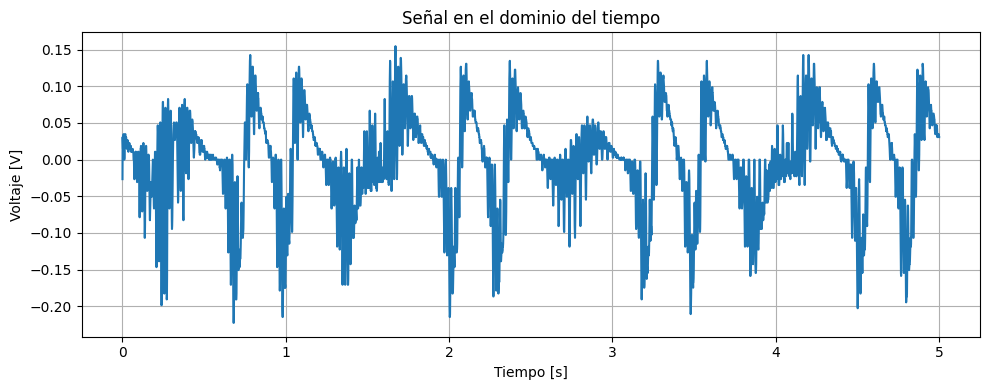

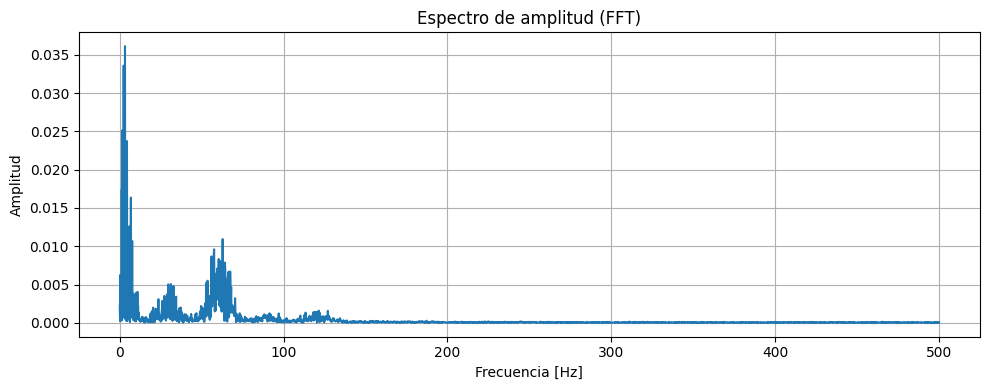


Frecuencias con amplitud >= 0.007:
  3.200 Hz  ->  amplitud 0.03611
  2.400 Hz  ->  amplitud 0.03357
  2.800 Hz  ->  amplitud 0.02548
  1.600 Hz  ->  amplitud 0.02513
  4.400 Hz  ->  amplitud 0.02373
  3.600 Hz  ->  amplitud 0.01987
  4.000 Hz  ->  amplitud 0.01975
  1.200 Hz  ->  amplitud 0.01740
  6.800 Hz  ->  amplitud 0.01636
  6.000 Hz  ->  amplitud 0.01261
  62.800 Hz  ->  amplitud 0.01093
  7.600 Hz  ->  amplitud 0.01069
  4.800 Hz  ->  amplitud 0.01035
  57.600 Hz  ->  amplitud 0.00960
  57.400 Hz  ->  amplitud 0.00896
  56.000 Hz  ->  amplitud 0.00867
  62.600 Hz  ->  amplitud 0.00855
  57.200 Hz  ->  amplitud 0.00851
  60.400 Hz  ->  amplitud 0.00834
  2.000 Hz  ->  amplitud 0.00823
  61.200 Hz  ->  amplitud 0.00809
  64.200 Hz  ->  amplitud 0.00787
  63.000 Hz  ->  amplitud 0.00784
  59.600 Hz  ->  amplitud 0.00710


[(np.float64(3.2), np.float64(0.03611344385861392)),
 (np.float64(2.4000000000000004), np.float64(0.03357179845441896)),
 (np.float64(2.8000000000000003), np.float64(0.02548417637630193)),
 (np.float64(1.6), np.float64(0.02512598828069249)),
 (np.float64(4.4), np.float64(0.02372704043362998)),
 (np.float64(3.6), np.float64(0.01987161753818429)),
 (np.float64(4.0), np.float64(0.019752147557632424)),
 (np.float64(1.2000000000000002), np.float64(0.017404274626958337)),
 (np.float64(6.800000000000001), np.float64(0.016357281150552305)),
 (np.float64(6.0), np.float64(0.012613231812759078)),
 (np.float64(62.800000000000004), np.float64(0.010930176858167915)),
 (np.float64(7.6000000000000005), np.float64(0.010686563767528771)),
 (np.float64(4.800000000000001), np.float64(0.010350783454454596)),
 (np.float64(57.6), np.float64(0.009600318450409137)),
 (np.float64(57.400000000000006), np.float64(0.008959950095996844)),
 (np.float64(56.0), np.float64(0.008666296603552134)),
 (np.float64(62.6), np

In [21]:
analizar_senal("/content/calibrate_sin1.csv", amp_threshold=0.007)

## calibrate_sin2

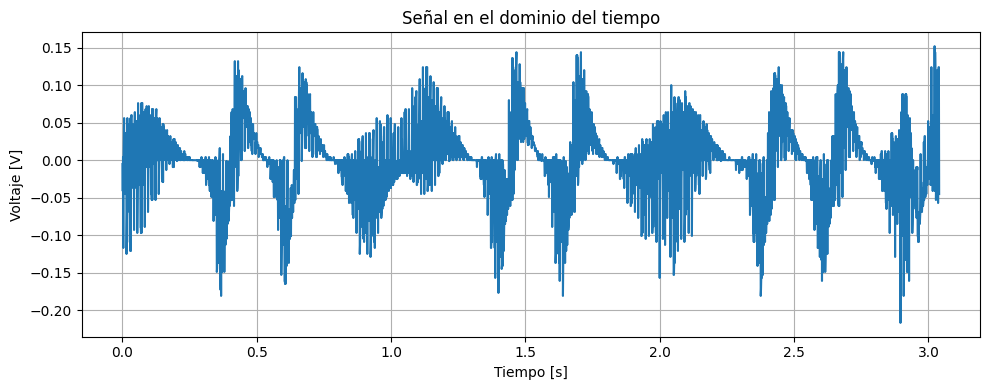

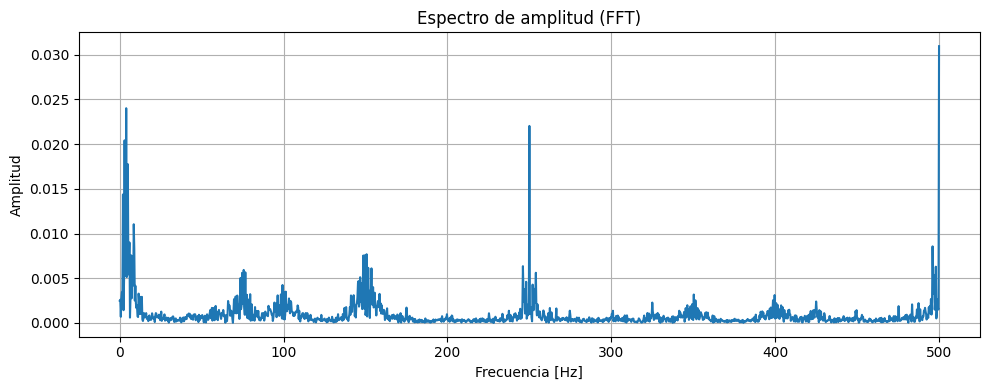


Frecuencias con amplitud >= 0.005:
  500.000 Hz  ->  amplitud 0.03095
  3.947 Hz  ->  amplitud 0.02401
  250.000 Hz  ->  amplitud 0.02203
  2.961 Hz  ->  amplitud 0.02042
  4.934 Hz  ->  amplitud 0.01775
  1.974 Hz  ->  amplitud 0.01436
  8.553 Hz  ->  amplitud 0.01103
  5.921 Hz  ->  amplitud 0.00900
  4.605 Hz  ->  amplitud 0.00861
  496.053 Hz  ->  amplitud 0.00856
  8.882 Hz  ->  amplitud 0.00825
  150.658 Hz  ->  amplitud 0.00768
  149.671 Hz  ->  amplitud 0.00757
  6.908 Hz  ->  amplitud 0.00756
  148.684 Hz  ->  amplitud 0.00754
  7.895 Hz  ->  amplitud 0.00746
  7.566 Hz  ->  amplitud 0.00738
  3.618 Hz  ->  amplitud 0.00725
  246.053 Hz  ->  amplitud 0.00634
  498.026 Hz  ->  amplitud 0.00629
  5.592 Hz  ->  amplitud 0.00622
  151.645 Hz  ->  amplitud 0.00616
  153.618 Hz  ->  amplitud 0.00610
  75.658 Hz  ->  amplitud 0.00592
  76.645 Hz  ->  amplitud 0.00566
  253.947 Hz  ->  amplitud 0.00561
  74.671 Hz  ->  amplitud 0.00560
  5.263 Hz  ->  amplitud 0.00543
  497.039 Hz  -

[(np.float64(500.00000000000006), np.float64(0.03094931457262011)),
 (np.float64(3.947368421052632), np.float64(0.024010485232498026)),
 (np.float64(250.00000000000003), np.float64(0.022028661255486335)),
 (np.float64(2.960526315789474), np.float64(0.020417217951955096)),
 (np.float64(4.934210526315789), np.float64(0.017748262567240436)),
 (np.float64(1.973684210526316), np.float64(0.014364278912277938)),
 (np.float64(8.55263157894737), np.float64(0.011034143606444193)),
 (np.float64(5.921052631578948), np.float64(0.009001939971933577)),
 (np.float64(4.605263157894737), np.float64(0.008611173390732071)),
 (np.float64(496.0526315789474), np.float64(0.008561897651726996)),
 (np.float64(8.881578947368421), np.float64(0.008252751992140227)),
 (np.float64(150.6578947368421), np.float64(0.007681257923107383)),
 (np.float64(149.67105263157896), np.float64(0.007570229584091794)),
 (np.float64(6.907894736842106), np.float64(0.007562613286773193)),
 (np.float64(148.6842105263158), np.float64(0.0

In [22]:
analizar_senal("/content/calibrate_sin2.csv", amp_threshold=0.005)

## calibrate_sin05

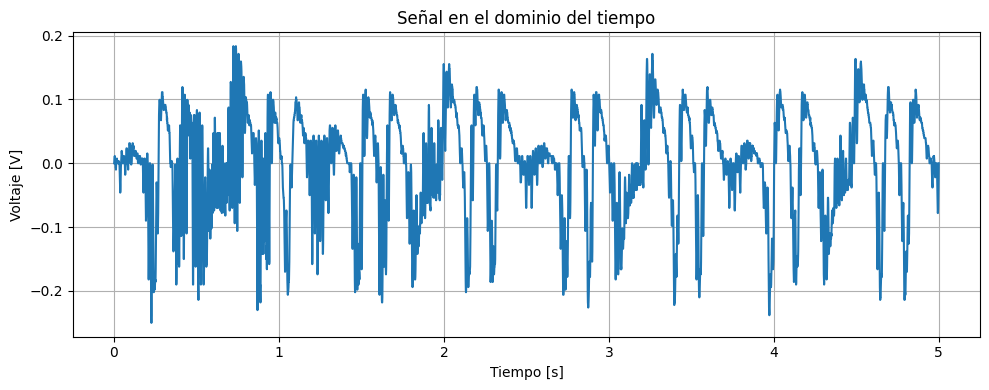

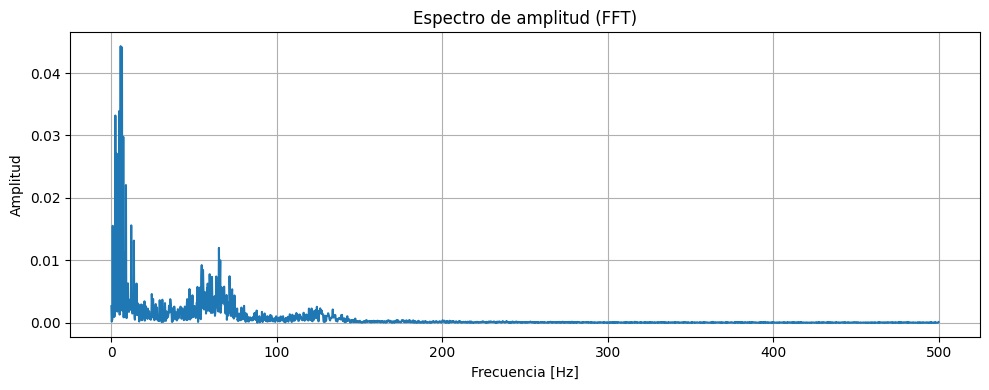


Frecuencias con amplitud >= 0.01:
  5.600 Hz  ->  amplitud 0.04430
  6.400 Hz  ->  amplitud 0.04411
  4.800 Hz  ->  amplitud 0.03393
  2.400 Hz  ->  amplitud 0.03320
  7.200 Hz  ->  amplitud 0.02979
  3.200 Hz  ->  amplitud 0.02710
  8.800 Hz  ->  amplitud 0.02207
  12.000 Hz  ->  amplitud 0.01561
  0.800 Hz  ->  amplitud 0.01554
  13.600 Hz  ->  amplitud 0.01317
  65.000 Hz  ->  amplitud 0.01201
  8.000 Hz  ->  amplitud 0.01125
  4.000 Hz  ->  amplitud 0.01031
  65.800 Hz  ->  amplitud 0.01002


[(np.float64(5.6000000000000005), np.float64(0.04430043488656813)),
 (np.float64(6.4), np.float64(0.04410891079264653)),
 (np.float64(4.800000000000001), np.float64(0.03393478039173499)),
 (np.float64(2.4000000000000004), np.float64(0.033195608790582934)),
 (np.float64(7.2), np.float64(0.02978906284882274)),
 (np.float64(3.2), np.float64(0.027103107454792885)),
 (np.float64(8.8), np.float64(0.02206848803566631)),
 (np.float64(12.0), np.float64(0.01561378203905372)),
 (np.float64(0.8), np.float64(0.01553835782957948)),
 (np.float64(13.600000000000001), np.float64(0.01317328997963398)),
 (np.float64(65.0), np.float64(0.012009991477959083)),
 (np.float64(8.0), np.float64(0.011251931215274763)),
 (np.float64(4.0), np.float64(0.010310053952412548)),
 (np.float64(65.8), np.float64(0.010018567006140146))]

In [23]:
analizar_senal("/content/calibrate_sin05.csv",amp_threshold=0.01)

## calibrate_sin10

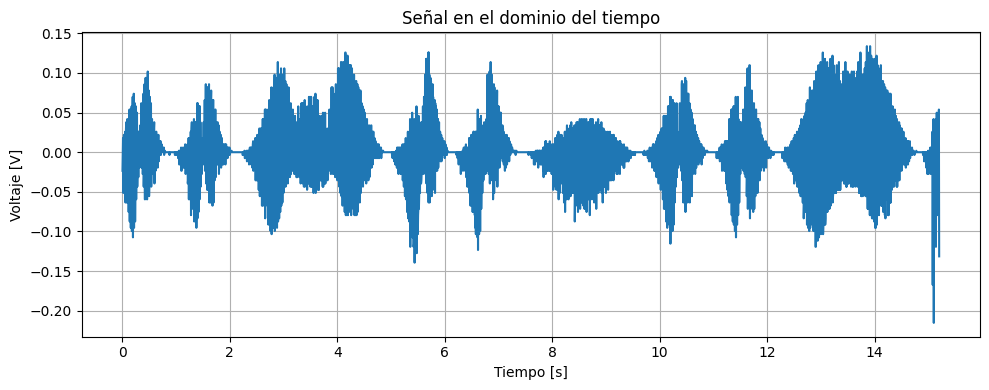

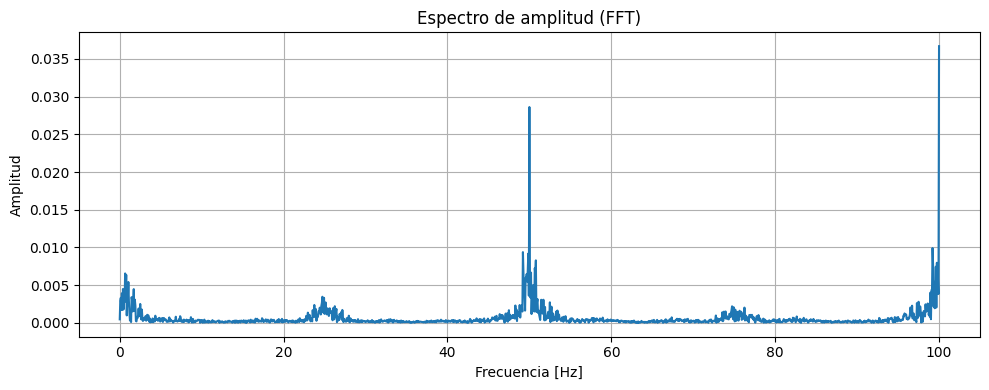


Frecuencias con amplitud >= 0.005:
  100.000 Hz  ->  amplitud 0.03668
  50.000 Hz  ->  amplitud 0.02861
  99.211 Hz  ->  amplitud 0.00993
  49.211 Hz  ->  amplitud 0.00938
  49.868 Hz  ->  amplitud 0.00919
  50.789 Hz  ->  amplitud 0.00829
  99.737 Hz  ->  amplitud 0.00797
  99.276 Hz  ->  amplitud 0.00754
  99.605 Hz  ->  amplitud 0.00746
  50.658 Hz  ->  amplitud 0.00725
  49.803 Hz  ->  amplitud 0.00701
  49.276 Hz  ->  amplitud 0.00673
  50.197 Hz  ->  amplitud 0.00667
  0.658 Hz  ->  amplitud 0.00656
  50.066 Hz  ->  amplitud 0.00651
  50.724 Hz  ->  amplitud 0.00651
  49.671 Hz  ->  amplitud 0.00649
  0.789 Hz  ->  amplitud 0.00637
  49.539 Hz  ->  amplitud 0.00600
  49.605 Hz  ->  amplitud 0.00588
  99.868 Hz  ->  amplitud 0.00583
  99.803 Hz  ->  amplitud 0.00565
  49.737 Hz  ->  amplitud 0.00548
  99.408 Hz  ->  amplitud 0.00545
  1.053 Hz  ->  amplitud 0.00542
  50.461 Hz  ->  amplitud 0.00501


[(np.float64(100.0), np.float64(0.03667542119201917)),
 (np.float64(50.0), np.float64(0.028610320031899165)),
 (np.float64(99.21052631578947), np.float64(0.009928107409544518)),
 (np.float64(49.21052631578947), np.float64(0.009383861878013058)),
 (np.float64(49.868421052631575), np.float64(0.009192578027319128)),
 (np.float64(50.78947368421052), np.float64(0.008291905367208443)),
 (np.float64(99.73684210526315), np.float64(0.007972554465654919)),
 (np.float64(99.27631578947368), np.float64(0.007543317720908086)),
 (np.float64(99.60526315789473), np.float64(0.0074589691554643065)),
 (np.float64(50.6578947368421), np.float64(0.007247439446719854)),
 (np.float64(49.80263157894736), np.float64(0.007010477670058461)),
 (np.float64(49.276315789473685), np.float64(0.006728893156700791)),
 (np.float64(50.19736842105263), np.float64(0.006669683447778876)),
 (np.float64(0.6578947368421052), np.float64(0.006557824385675113)),
 (np.float64(50.065789473684205), np.float64(0.006510166985545074)),
 (

In [24]:
analizar_senal("/content/calibrate_sin10.csv", amp_threshold=0.005)